## Observations

In [1]:
using LinearAlgebra
using Plots

In [2]:
include("../rollout.jl")
include("../testfns.jl")

ConstantTestFunction (generic function with 2 methods)

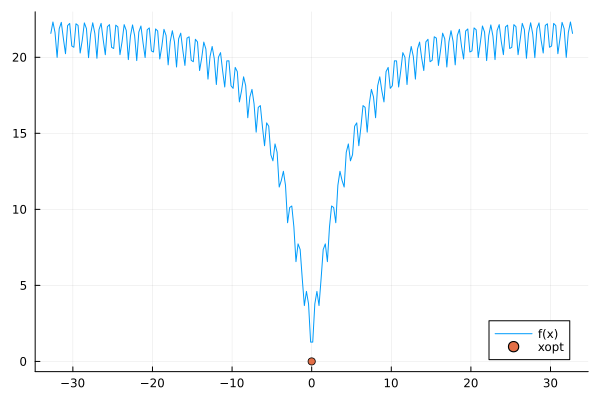

In [56]:
testfn = TestAckley(1)
tplot(testfn)

In [83]:
n, h, σn2 = 1, 1, 1e-4
MC_SAMPLES = 50
# Setup low discrepancy random number stream
lds_rns = gen_low_discrepancy_sequence(MC_SAMPLES, testfn.dim, h+1);
rns = randn(MC_SAMPLES, testfn.dim+1, h+1);

xmin, xmax, d = (testfn.bounds[1], testfn.bounds[2], size(testfn.bounds, 1))
θ = [.25]
ψ = kernel_matern52(θ)

lbs, ubs = [xmin], [xmax]
ϵ, num_starts = 1e-6, 4
s = SobolSeq(lbs, ubs)

xstarts = reduce(hcat, next!(s) for i = 1:num_starts)
xstarts = hcat(xstarts, lbs .+ ϵ)
xstarts = hcat(xstarts, ubs .- ϵ);

### Dense Experiments in 1D for Rollout Acquisition Functions
We'll do a comparative analysis, visually, of the structure of the rollout acquisition function in 1D for horizons 0 and 1.

In [87]:
# X = [1. 1.;
#      -.5 1.;]
X = [-12.;; 10.;; 10.1;;]
ϵ = 1e-6
N = size(X, 2) - 1

# Construct perturbation matrix for each respective dimension
δXs = [hcat(zeros(d, N), ϵ * I(testfn.dim)[:, j]) for j in 1:d]

y = [testfn.f(X[:,j]) for j in 1:size(X, 2)]
∇y = [testfn.∇f(X[:,j]) for j in 1:size(X, 2)]
sur = fit_surrogate(ψ, X, y; σn2=σn2)
fsur = fit_fsurrogate(sur, h)
mfsur = fit_multioutput_fsurrogate(sur, h)

x0 = [10.5]

# Evaluate the surrogate at the initial location
sx0 = fsur(x0)
δsx0 = nothing
δfsur = nothing

# Perturb in each respective dimension
for j in 1:d
    δfsur = fit_δsurrogate(fsur, δXs[j], ∇y)
    δsx0 = δfsur(sx0)
end

# # δsurs = fit_δsurrogate(fsur, 
# # domain = xmin:.01:xmax

In [88]:
sur.K

3×3 Matrix{Float64}:
 1.0001       4.56629e-82  1.88377e-82
 4.56629e-82  1.0001       0.883545
 1.88377e-82  0.883545     1.0001

In [65]:
domain = lbs[1]:.01:ubs[1]

-32.768:0.01:32.762

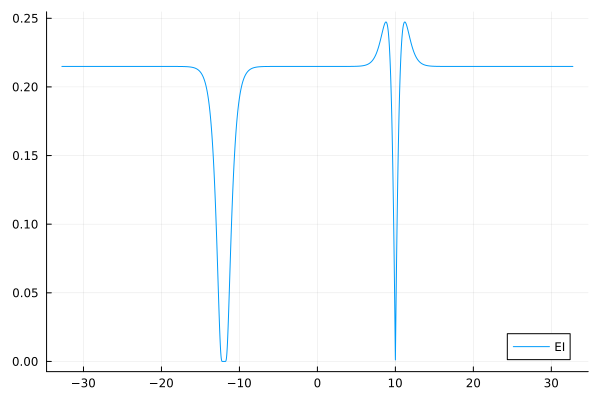

In [66]:
plot(domain, [sur([x]).EI for x in domain], label="EI")

In [19]:
x0 = [-30., 10.]
sx0 = sur(x0);
δsx = 

In [17]:
y

2-element Vector{Float64}:
  0.2845735757622698
 -0.2845735757622698